# Machine Learning Course 2025 HW2
The code scripts are from [aideml](https://github.com/WecoAI/aideml) project on github with some modifications.

<font color='red'>Make a copy before running or editing the code.</font>

## Prerequisites

In [1]:
# check GPU
!nvidia-smi

Tue Mar 18 10:14:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!nvcc --version
!python -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Python 3.11.11


In [18]:
!pip install dataclasses_json==0.6.4 shutup==0.2.0
!pip install instructor
!python3 -m pip install --no-cache-dir llama-cpp-python==0.3.4 --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu122

# for gemma-3，但失敗，都只能用 cpu 跑
# !export CMAKE_ARGS="-DGGML_CUDA=on -DCUDA_PATH=/usr/local/cuda-12.2 -DCUDAToolkit_ROOT=/usr/local/cuda-12.2 -DCUDAToolkit_INCLUDE_DIR=/usr/local/cuda-12/include -DCUDAToolkit_LIBRARY_DIR=/usr/local/cuda-12.2/lib64"
# !export CUDACXX=/usr/local/cuda-12.2/bin/nvcc
# !pip install llama-cpp-python --no-cache-dir

  Using cached instructor-1.7.7-py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.6/345.6 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing installation: jiter 0.9.0
    Uninstalling jiter-0.9.0:
      Successfully uninstalled jiter-0.9.0
Looking in indexes: https://pypi.org/simple, https://abetlen.github.io/llama-cpp-python/whl/cu122


In [4]:
from llama_cpp.llama_cpp import load_shared_library

import pathlib

def is_gpu_available_v3() -> bool:

    lib = load_shared_library('llama',pathlib.Path('/usr/local/lib/python3.11/dist-packages/llama_cpp/lib'))

    return bool(lib.llama_supports_gpu_offload())

print(is_gpu_available_v3())
assert is_gpu_available_v3()

ggml_cuda_init: GGML_CUDA_FORCE_MMQ:    yes
ggml_cuda_init: GGML_CUDA_FORCE_CUBLAS: no
ggml_cuda_init: found 1 CUDA devices:
  Device 0: Tesla T4, compute capability 7.5, VMM: yes


True


In [5]:
# Download dataset

!gdown --id 1PAI4_3kRWwIPQMscMdGt9HLqZZy1vWSD

# Choose a workable link
# !gdown --id 1XtF9-hGw2tKe4WvUMW5YE6lj6p1QcWIc
# !gdown --id 1diswE_9XoT-uII23ucRppau1ErEQkY2y
# !gdown --id 1BAVMzLZqEgtG8rwog7ttC7xKPw5QTngn
# !gdown --id 1Ah5uV6cu3Bnz6WfkUuxEZCLqj5k1lbpd

!unzip /content/ML2025Spring-hw2-public.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PAI4_3kRWwIPQMscMdGt9HLqZZy1vWSD
To: /content/ML2025Spring-hw2-public.zip
100% 621k/621k [00:00<00:00, 9.17MB/s]
Archive:  /content/ML2025Spring-hw2-public.zip
   creating: ML2025Spring-hw2-public/
  inflating: ML2025Spring-hw2-public/sample_submission.csv  
  inflating: ML2025Spring-hw2-public/test.csv  
  inflating: ML2025Spring-hw2-public/train.csv  


# 分析資料

In [6]:
train_path = "/content/ML2025Spring-hw2-public/train.csv"

# Numerical Operations
import math
import numpy as np

import matplotlib.pyplot as plt

# Reading/Writing Data
import pandas as pd
import os
import csv

In [7]:
df = pd.read_csv(train_path)
df

,id,AL,AZ,CA,CO,CT,FL,GA,IL,IN,...,wothers_distanced_public_day3,wshop_indoors_day3,wrestaurant_indoors_day3,wworried_catch_covid_day3,hh_cmnty_cli_day3,nohh_cmnty_cli_day3,wearing_mask_7d_day3,public_transit_day3,worried_finances_day3,tested_positive_day3
0,0,1,0,0,0,0,0,0,0,0,...,19.271113,69.050180,38.102142,47.130223,22.686202,17.583283,62.925033,2.704414,39.222329,18.490787
1,1,1,0,0,0,0,0,0,0,0,...,19.500509,68.847156,37.338682,46.598421,22.484758,17.219515,62.771641,2.474973,41.209073,16.329253
2,2,1,0,0,0,0,0,0,0,0,...,18.938706,68.694620,37.543537,46.858400,22.506261,17.128204,62.546116,2.569940,39.636816,16.522931
3,3,1,0,0,0,0,0,0,0,0,...,18.698535,69.339191,37.751874,44.633652,22.369951,17.069263,61.517466,2.610086,38.926817,15.578501
4,4,1,0,0,0,0,0,0,0,0,...,18.034980,69.564435,38.341833,44.100299,21.440588,16.207377,60.933647,2.790749,39.840306,14.171920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,3004,0,0,0,0,0,0,0,0,0,...,11.949304,67.172136,45.253751,34.677094,15.416655,11.389769,28.867455,6.065089,30.451465,6.487310
3005,3005,0,0,0,0,0,0,0,0,0,...,12.525530,66.725856,44.988865,33.589880,15.755713,11.811906,29.482770,6.216503,31.196935,6.112827
3006,3006,0,0,0,0,0,0,0,0,0,...,13.271182,66.913987,45.316672,33.076780,15.538073,11.435870,28.911782,6.157999,31.492405,6.151394
3007,3007,0,0,0,0,0,0,0,0,0,...,12.185653,68.278056,46.760569,32.359431,15.980730,11.592346,28.151731,5.886028,32.338100,7.165580


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 89 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3009 non-null   int64  
 1   AL                                 3009 non-null   int64  
 2   AZ                                 3009 non-null   int64  
 3   CA                                 3009 non-null   int64  
 4   CO                                 3009 non-null   int64  
 5   CT                                 3009 non-null   int64  
 6   FL                                 3009 non-null   int64  
 7   GA                                 3009 non-null   int64  
 8   IL                                 3009 non-null   int64  
 9   IN                                 3009 non-null   int64  
 10  IA                                 3009 non-null   int64  
 11  KS                                 3009 non-null   int64

In [9]:
df.describe()

,id,AL,AZ,CA,CO,CT,FL,GA,IL,IN,...,wothers_distanced_public_day3,wshop_indoors_day3,wrestaurant_indoors_day3,wworried_catch_covid_day3,hh_cmnty_cli_day3,nohh_cmnty_cli_day3,wearing_mask_7d_day3,public_transit_day3,worried_finances_day3,tested_positive_day3
count,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,...,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000
mean,1504.000000,0.029246,0.029246,0.029246,0.029246,0.029246,0.029246,0.029246,0.029246,0.029246,...,18.621633,65.388258,35.893911,46.012602,24.988992,19.929889,60.577204,4.625976,36.534406,17.305063
std,868.767806,0.168522,0.168522,0.168522,0.168522,0.168522,0.168522,0.168522,0.168522,0.168522,...,3.922348,3.977411,5.456327,7.222752,10.739559,9.967520,13.706937,2.067438,3.291910,9.914877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.160316,52.795552,19.442195,27.061680,9.615388,5.980560,27.768290,1.813682,27.602169,3.054288
25%,752.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.857245,63.124286,32.073634,40.754144,16.100516,11.475278,50.691021,3.252371,34.149117,9.101412
50%,1504.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.926387,66.258449,36.522056,45.680923,22.030417,17.319409,59.626054,4.141356,36.249582,14.848052
75%,2256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.069870,68.398967,39.923565,50.950157,30.732978,25.306896,70.455662,5.429708,38.690061,23.361068
max,3008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.159699,73.810029,50.561672,68.028910,60.165463,53.295823,90.558231,15.513524,46.305496,46.952473


# Feature Selection
Choose features you deem useful by modifying the function below.
* https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
* https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
* https://ithelp.ithome.com.tw/articles/10245037

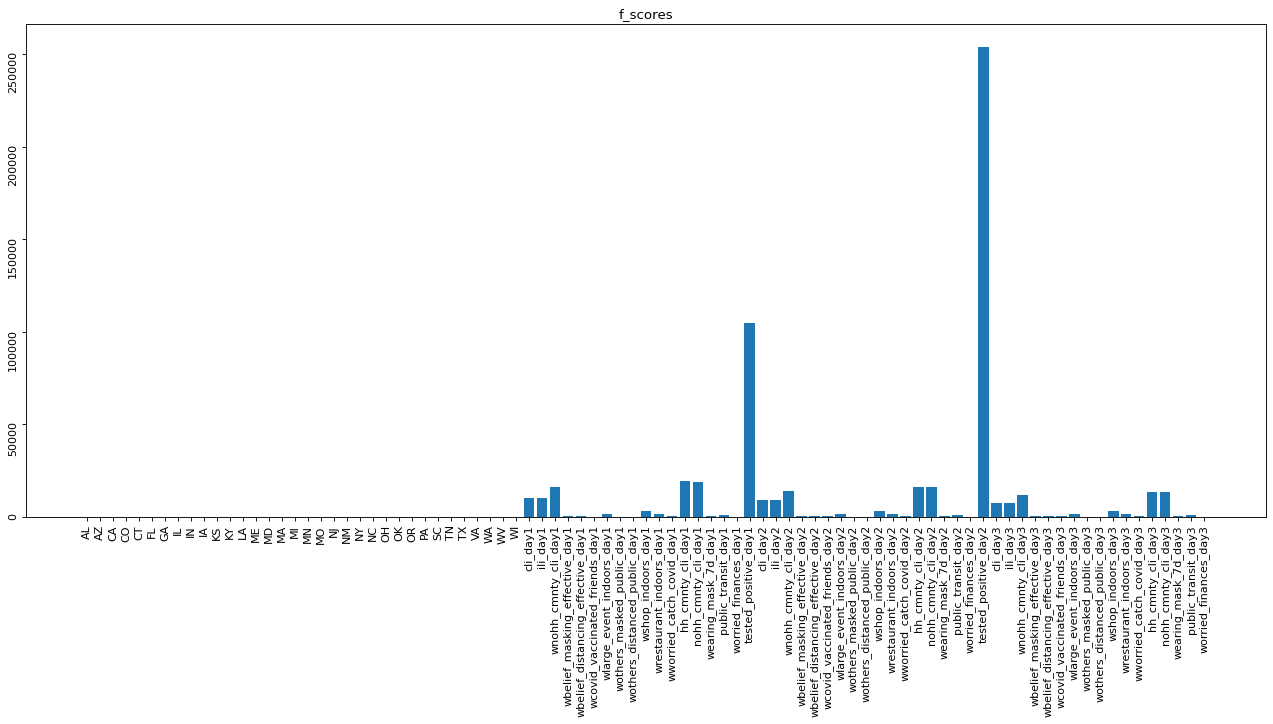

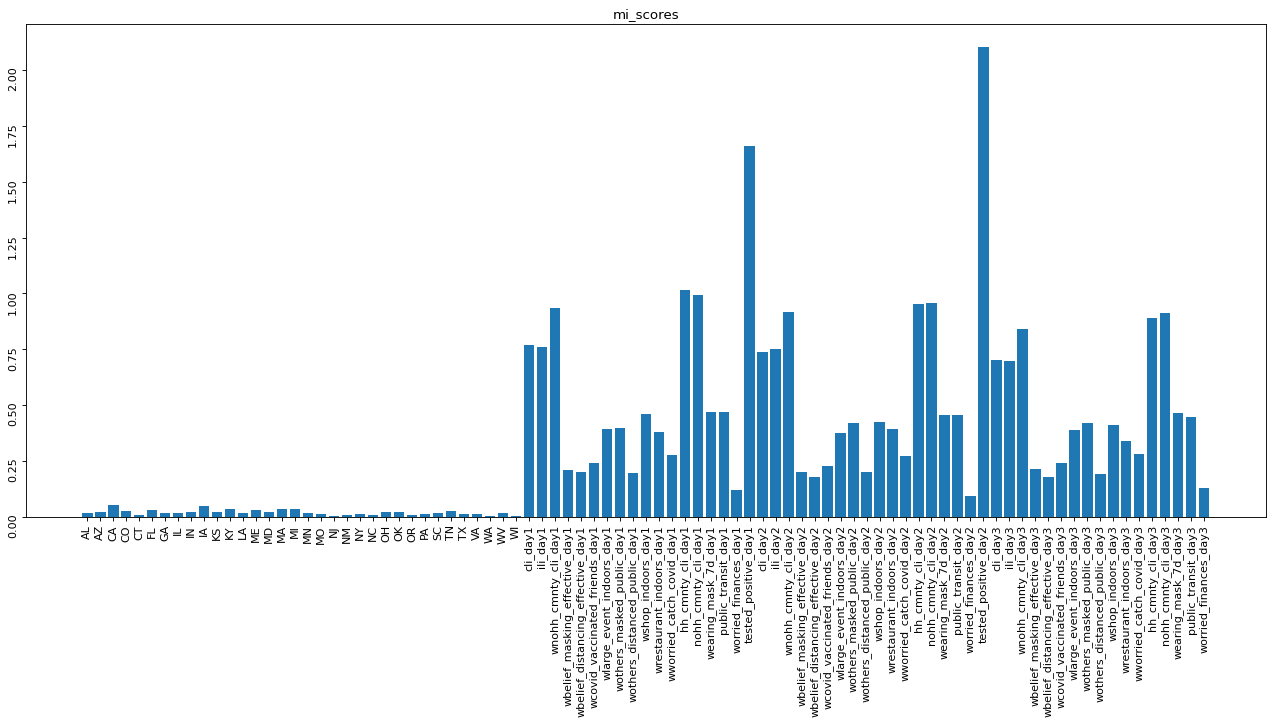

AL                                  => F:         35.949 	 p_values:0.00000 	 MI:0.01706
AZ                                  => F:          7.248 	 p_values:0.00714 	 MI:0.02070
CA                                  => F:        111.642 	 p_values:0.00000 	 MI:0.05180
CO                                  => F:          3.397 	 p_values:0.06540 	 MI:0.02667
CT                                  => F:         55.689 	 p_values:0.00000 	 MI:0.00984
FL                                  => F:        103.329 	 p_values:0.00000 	 MI:0.03214
GA                                  => F:         48.863 	 p_values:0.00000 	 MI:0.01735
IL                                  => F:         35.933 	 p_values:0.00000 	 MI:0.01664
IN                                  => F:          1.166 	 p_values:0.28024 	 MI:0.02062
IA                                  => F:         31.902 	 p_values:0.00000 	 MI:0.04993
KS                                  => F:          1.008 	 p_values:0.31543 	 MI:0.02215
KY                   

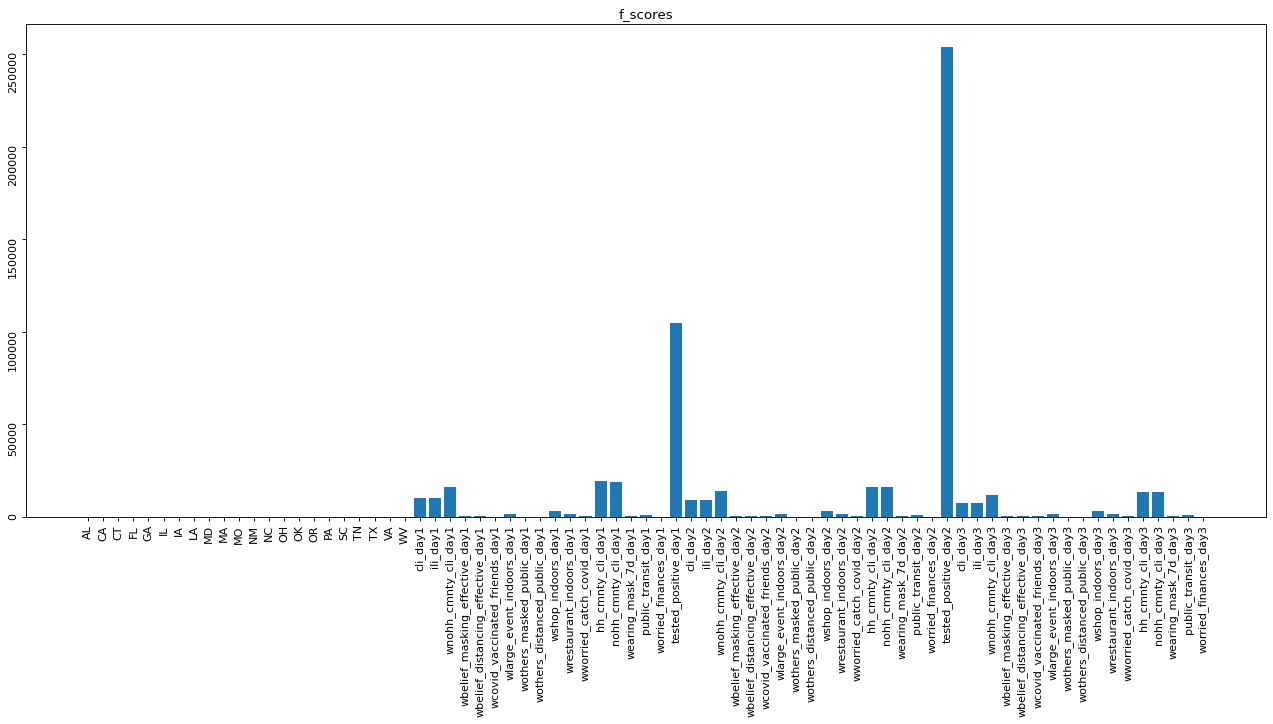

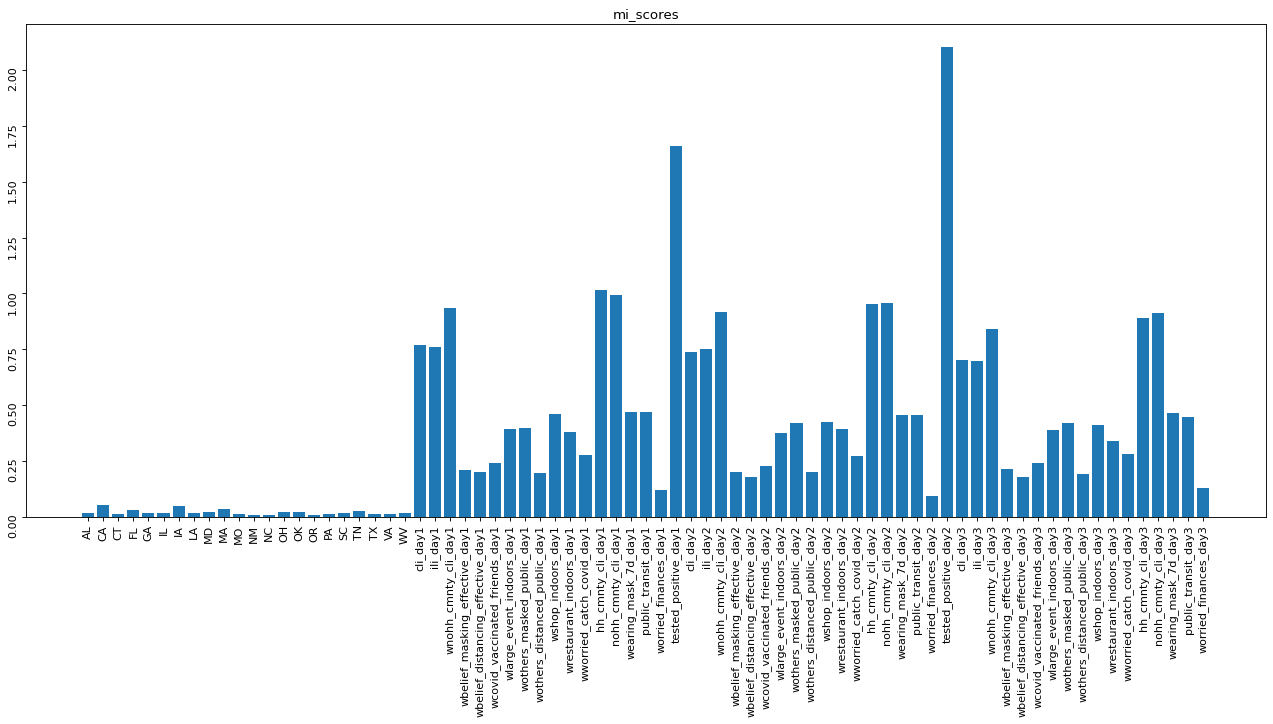

AL                                  => F:         35.949 	 p_values:0.00000 	 MI:0.01706
CA                                  => F:        111.642 	 p_values:0.00000 	 MI:0.05180
CT                                  => F:         55.689 	 p_values:0.00000 	 MI:0.01006
FL                                  => F:        103.329 	 p_values:0.00000 	 MI:0.03214
GA                                  => F:         48.863 	 p_values:0.00000 	 MI:0.01735
IL                                  => F:         35.933 	 p_values:0.00000 	 MI:0.01664
IA                                  => F:         31.902 	 p_values:0.00000 	 MI:0.04993
LA                                  => F:         63.422 	 p_values:0.00000 	 MI:0.01530
MD                                  => F:         69.897 	 p_values:0.00000 	 MI:0.02275
MA                                  => F:         85.821 	 p_values:0.00000 	 MI:0.03575
MO                                  => F:         29.650 	 p_values:0.00000 	 MI:0.01426
NM                   

In [10]:
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot

def plot_bar(title, columns, scores):
    pyplot.figure(figsize=(20, 8), dpi=80)
    pyplot.title(title)
    pyplot.bar([i for i in range(len(columns))], scores, tick_label=columns)
    pyplot.tick_params(rotation=90)
    pyplot.show()

train_data = pd.read_csv(train_path)
train_data = train_data.drop(columns=["id"])

X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# 計算 F 值與 MI 值
f_scores, f_p_values = f_regression(X, y)
plot_bar("f_scores", X.columns, f_scores)
mi_scores = mutual_info_regression(X, y)
plot_bar("mi_scores", X.columns, mi_scores)

# 1️⃣ F 值 (f_regression)
# 📌 數值範圍：F 值理論上可以從 0 到 無窮大（但實務上通常在 0 到數百之間）。
# 📌 一般解讀方式：
# F 值越高，表示該特徵與目標變數的 線性關聯性 越強。
# F 值 ≈ 1，表示該特徵與目標變數 無明顯關聯（可能是無效特徵）。
# F 值 > 10，通常表示該特徵對目標變數有較強的影響力（但仍需與 p 值一起分析）。
# F 值特別大，可能代表該特徵與目標變數有 極強的線性關係，或數據有某種偏差（例如極端值或資料不均衡）。

# 2️⃣ MI 值 (mutual_info_regression)
# 📌 數值範圍：MI 值為 非負數（通常介於 0 ~ 3 之間，但可能更高）。
# 📌 一般解讀方式：
# MI 值 = 0，表示該特徵與目標變數 沒有關係（或完全獨立）。
# MI 值接近 0，表示該特徵提供的信息量極少。
# MI 值 > 0.1，表示該特徵對預測目標變數有影響。
# MI 值 > 0.5，表示該特徵提供了 較強的信息量。
# MI 值 > 1.0，表示該特徵對預測目標變數貢獻 很大（但要注意過擬合風險）。

# 🔹 總結：如何使用 F 值與 MI 值來選擇特徵？
# ✅ 策略 1：設定閾值
# 選擇 F 值 > 10 或 MI 值 > 0.1 的特徵，刪除影響力極小的特徵。
# ✅ 策略 2：同時考慮 F 值與 MI 值
# 如果 F 值高 & MI 值高：這個特徵對模型很重要，應該保留！
# 如果 F 值高 & MI 值低：該特徵與目標變數 僅有線性關聯，但非線性關係較弱，可能仍有用。
# 如果 F 值低 & MI 值高：該特徵可能具有 非線性關聯，可以考慮非線性模型（如決策樹、XGBoost）。
# 如果 F 值低 & MI 值低：這個特徵幾乎沒用，建議刪除。

# what are scores for the features
for i in range(len(f_scores)):
    print(f'{X.columns[i]:35} => F:{f_scores[i]: 15.3f} \t p_values:{f_p_values[i]:1.5f} \t MI:{mi_scores[i]:2.5f}')

# 轉換為 DataFrame，方便篩選
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_scores,
    'P_Value': f_p_values,
    'MI_Score': mi_scores
})

# 設定閾值篩選重要特徵
selected_features = feature_scores[
    ((feature_scores['F_Score'] > 10) & (feature_scores['P_Value'] < 0.05)) | (feature_scores['MI_Score'] > 0.1)
]['Feature'].tolist()

# 保留選中的特徵
X_selected = X[selected_features]

# 顯示選中的特徵
print(f"Selected {len(selected_features)} features: {selected_features}")

# 重新計算 F 值與 MI 值
f_scores, f_p_values = f_regression(X_selected, y)
plot_bar("f_scores", X_selected.columns, f_scores)
mi_scores = mutual_info_regression(X_selected, y)
plot_bar("mi_scores", X_selected.columns, mi_scores)

# what are scores for the features
for i in range(len(f_scores)):
    print(f'{X_selected.columns[i]:35} => F:{f_scores[i]: 15.3f} \t p_values:{f_p_values[i]:1.5f} \t MI:{mi_scores[i]:2.5f}')

In [11]:
# %%script false --no-raise-error

# ========================== TODO: try different LLM ==========================
# Hugging Face: https://huggingface.co/models?library=gguf
# OpenLLM Leaderboard: https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard#/?params=7%2C65&official=true
# remember to replace 'blob' with 'resolve' in the link you copy.
# !wget https://huggingface.co/bartowski/Meta-Llama-3.1-8B-Instruct-GGUF/resolve/main/Meta-Llama-3.1-8B-Instruct-Q8_0.gguf
# !wget https://huggingface.co/TheBloke/deepseek-coder-6.7B-instruct-GGUF/resolve/main/deepseek-coder-6.7b-instruct.Q8_0.gguf
# !wget https://huggingface.co/Qwen/Qwen2.5-Coder-7B-Instruct-GGUF/resolve/main/qwen2.5-coder-7b-instruct-q8_0.gguf
# !wget https://huggingface.co/Qwen/Qwen2.5-Coder-32B-Instruct-GGUF/resolve/main/qwen2.5-coder-32b-instruct-q4_0.gguf
!wget https://huggingface.co/Qwen/Qwen2.5-Coder-14B-Instruct-GGUF/resolve/main/qwen2.5-coder-14b-instruct-q6_k.gguf

# 失敗
# !wget https://huggingface.co/unsloth/gemma-3-27b-it-GGUF/resolve/main/gemma-3-27b-it-Q5_K_M.gguf
# !wget https://huggingface.co/unsloth/gemma-3-27b-it-GGUF/resolve/main/gemma-3-27b-it-Q4_K_M.gguf
# !wget https://huggingface.co/unsloth/gemma-3-12b-it-GGUF/resolve/main/gemma-3-12b-it-Q8_0.gguf

# fail colab
# !wget https://huggingface.co/lmstudio-community/DeepSeek-Coder-V2-Lite-Instruct-GGUF/resolve/main/DeepSeek-Coder-V2-Lite-Instruct-Q8_0.gguf
# !wget https://huggingface.co/Qwen/Qwen2.5-Coder-14B-Instruct-GGUF/resolve/main/qwen2.5-coder-14b-instruct-q8_0.gguf


--2025-03-18 10:15:58--  https://huggingface.co/Qwen/Qwen2.5-Coder-14B-Instruct-GGUF/resolve/main/qwen2.5-coder-14b-instruct-q6_k.gguf
Resolving huggingface.co (huggingface.co)... 3.167.212.116, 3.167.212.25, 3.167.212.29, ...
Connecting to huggingface.co (huggingface.co)|3.167.212.116|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/4f/04/4f041c631b7508e84b09104dfe7e62b95af48eb8ac87fa555599db91d0af3802/302a079369ad8b66c8e8ec1bfa62d109c64d8015e9bfd52d9c6cf4c6c9f36b5f?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27qwen2.5-coder-14b-instruct-q6_k.gguf%3B+filename%3D%22qwen2.5-coder-14b-instruct-q6_k.gguf%22%3B&Expires=1742296558&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0MjI5NjU1OH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzRmLzA0LzRmMDQxYzYzMWI3NTA4ZTg0YjA5MTA0ZGZlN2U2MmI5NWFmNDhlYjhhYzg3ZmE1NTU1OTlkYjkxZDBhZjM4MDIvMzAyYTA3OTM2OWFkOGI2NmM4ZThl

In [12]:
# %%script false --no-raise-error

from llama_cpp import Llama

max_token = int(8192)

# Load the model onto GPU
myModel = Llama(
    # ========================== TODO: try different LLM ==========================
    # Before changing LLM, restart the session!
    "/content/qwen2.5-coder-14b-instruct-q6_k.gguf",
    verbose=True,
    n_gpu_layers=-1,
    n_ctx=max_token,    # This argument is how many tokens the model can take. The longer the better, but it will consume more memory.
)

def truncate(llama: Llama, input: str, maxlen: int) -> str:
    return llama.detokenize(llama.tokenize(input.encode())[:maxlen]).decode()

def generate_response(_model: Llama, _messages: str) -> str:
    print("======================================")
    # print("before", _messages)
    _messages[0]["content"] = truncate(_model, _messages[0]["content"], max_token)
    _messages[1]["content"] = truncate(_model, _messages[1]["content"], max_token)
    print("after", _messages)
    print("======================================")

    '''
    This function will inference the model with given messages.
    '''
    _output = _model.create_chat_completion(
        _messages,
        stop=["<|eot_id|>", "<|end_of_text|>"],
        max_tokens=4096,    # This argument is how many tokens the model can generate.
        temperature=0.0,      # This argument is the randomness of the model. 0 means no randomness. We suggest setting the temperature value to 0 for reproducibility.
    )["choices"][0]["message"]["content"]
    return _output

llama_load_model_from_file: using device CUDA0 (Tesla T4) - 14992 MiB free
llama_model_loader: loaded meta data with 29 key-value pairs and 579 tensors from /content/qwen2.5-coder-14b-instruct-q6_k.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = qwen2
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Qwen2.5 Coder 14B Instruct AWQ
llama_model_loader: - kv   3:                           general.finetune str              = Instruct-AWQ
llama_model_loader: - kv   4:                           general.basename str              = Qwen2.5-Coder
llama_model_loader: - kv   5:                         general.size_label str              = 14B
llama_model_loader: - kv   6:                 

## Functions

### Utils

In [13]:
# Define a function to save the best solution and other good solutions to files.
def save_run(cfg, journal):
    # Retrieve and save the best found solution.
    best_node = journal.get_best_node(only_good=False)  # Get the best node.
    with open("best_solution.py", "w") as f:
        f.write(best_node.code)

    good_nodes = journal.get_good_nodes()  # Retrieve all good solution nodes.
    for i, node in enumerate(good_nodes):
        filename = f"good_solution_{i}.py"
        with open(filename, "w") as f:
            f.write(node.code)

### Interpreter (DO NOT MODIFY THIS CELL)

In [14]:
"""
DO NOT MODIFY THIS CELL

Python interpreter for executing code snippets and capturing their output.
"""


import logging
import os
import queue
import signal
import sys
import time
import traceback
import zipfile
from pathlib import Path
from shutil import rmtree
import shutil
from multiprocessing import Process, Queue
from typing import Hashable, cast

import humanize
import rich
import shutup
from rich.logging import RichHandler
from rich.syntax import Syntax
from dataclasses import dataclass
from dataclasses_json import DataClassJsonMixin


@dataclass
class ExecutionResult(DataClassJsonMixin):
    """
    Result of executing a code snippet in the interpreter.
    Contains the output, execution time, and exception information.
    """
    term_out: list[str]
    exec_time: float
    exc_type: str | None
    exc_info: dict | None = None
    exc_stack: list[tuple] | None = None

def exception_summary(e, exec_file_name):
    """Generates a string that summarizes an exception and its stack trace"""
    tb_lines = traceback.format_exception(e)
    # Combine the traceback lines into a single string, skipping lines that contain "importlib".
    tb_str = "".join(
        [
            line
            for line in tb_lines
            # if "importlib" not in line  # Filter out unwanted traceback lines.
        ]
    )

    exc_info = {}
    if hasattr(e, "args"):
        exc_info["args"] = [str(i) for i in e.args]  # Store the exception arguments as strings.
    for att in ["name", "msg", "obj"]:
        if hasattr(e, att):
            exc_info[att] = str(getattr(e, att))  # Store additional attributes if available.

    tb = traceback.extract_tb(e.__traceback__)  # Extract the traceback information.
    # Create a list of tuples for each frame in the traceback.
    exc_stack = [(t.filename, t.lineno, t.name, t.line) for t in tb]

    return tb_str, e.__class__.__name__, exc_info, exc_stack  # Return the formatted traceback and exception details.

# Define a class that redirects write operations to a multiprocessing queue.
class RedirectQueue:
    def __init__(self, queue, timeout=5):
        self.queue = queue  # Store the provided queue.
        self.timeout = timeout  # Set the timeout for queue operations.

    def write(self, msg):
        try:
            self.queue.put(msg, timeout=self.timeout)  # Attempt to put the message into the queue.
        except queue.Full:
            print("Queue write timed out")  # Warn if the queue is full and the write times out.

    def flush(self):
        pass  # No operation is needed for flushing in this context.

# Define the Interpreter class that simulates a standalone Python REPL.
class Interpreter:
    def __init__(
        self,
        timeout: int = 3600,  # Default timeout of 3600 seconds.
        agent_file_name: str = "runfile.py",  # Default file name for writing the agent's code.
    ):
        """
        Simulates a standalone Python REPL with an execution time limit.

        Args:
            timeout (int, optional): Timeout for each code execution step. Defaults to 3600.
            agent_file_name (str, optional): The name for the agent's code file. Defaults to "runfile.py".
        """
        self.timeout = timeout  # Save the timeout value.
        self.agent_file_name = agent_file_name  # Save the agent file name.
        self.process: Process = None  # Initialize the process attribute (will hold the child process).

    def child_proc_setup(self, result_outq: Queue) -> None:
        # Import shutup to suppress warnings in the child process.
        import shutup

        shutup.mute_warnings()  # Mute all warnings before further execution.

        # Redirect both stdout and stderr to the provided result queue.
        # trunk-ignore(mypy/assignment)
        sys.stdout = sys.stderr = RedirectQueue(result_outq)

    def _run_session(
        self, code_inq: Queue, result_outq: Queue, event_outq: Queue
    ) -> None:
        self.child_proc_setup(result_outq)  # Set up the child process for capturing output.

        global_scope: dict = {}  # Create an empty dictionary to serve as the global scope.
        while True:  # Continuously wait for new code to execute.
            code = code_inq.get()  # Retrieve code from the code input queue.
            with open(self.agent_file_name, "w") as f:  # Open the agent file for writing.
                f.write(code)  # Write the received code into the file.

            event_outq.put(("state:ready",))  # Signal that the interpreter is ready to execute the code.
            try:
                # Compile and execute the code within the global scope.
                exec(compile(code, self.agent_file_name, "exec"), global_scope)
            except BaseException as e:
                # If an exception occurs, generate a summary of the exception.
                tb_str, e_cls_name, exc_info, exc_stack = exception_summary(
                    e,
                    self.agent_file_name,
                )
                result_outq.put(tb_str)  # Put the traceback string into the result queue.
                if e_cls_name == "KeyboardInterrupt":
                    e_cls_name = "TimeoutError"  # Convert a KeyboardInterrupt into a TimeoutError.

                event_outq.put(("state:finished", e_cls_name, exc_info, exc_stack))  # Signal that execution finished with an error.
            else:
                event_outq.put(("state:finished", None, None, None))  # Signal that execution finished successfully.

            os.remove(self.agent_file_name)  # Remove the agent file after execution.

            result_outq.put("<|EOF|>")  # Put an EOF marker to indicate the end of output.

    def create_process(self) -> None:
        # Create three queues for communication with the child process:
        # - code_inq: for sending code to execute.
        # - result_outq: for receiving output from the execution.
        # - event_outq: for receiving state events (like ready and finished).
        # trunk-ignore(mypy/var-annotated)
        self.code_inq, self.result_outq, self.event_outq = Queue(), Queue(), Queue()
        self.process = Process(
            target=self._run_session,  # Set the target function for the child process.
            args=(self.code_inq, self.result_outq, self.event_outq),  # Provide the necessary queues as arguments.
        )
        self.process.start()  # Start the child process.

    def cleanup_session(self):
        if self.process is None:  # If there is no process, nothing to clean up.
            return
        try:
            # Attempt to terminate the child process gracefully.
            self.process.terminate()  # Request the process to terminate.
            self.process.join(timeout=0.5)  # Wait for the process to finish with a 0.5-second timeout.

            if self.process.exitcode is None:  # If the process is still running,
                self.process.kill()  # Forcefully kill the process.
                self.process.join(timeout=0.5)  # Wait again for termination.

                if self.process.exitcode is None:  # If the process still hasn't terminated,
                    os.kill(self.process.pid, signal.SIGKILL)  # Send a SIGKILL signal.
        except Exception as e:
            print(f"Error during process cleanup: {e}")  # Print an error message if cleanup fails.
        finally:
            if self.process is not None:  # If the process exists,
                self.process.close()  # Close the process.
                self.process = None  # Reset the process attribute to None.

    def run(self, code: str, reset_session=True) -> ExecutionResult:
        """
        Execute the provided Python command in a separate process and return its output.

        Parameters:
            code (str): Python code to execute.
            reset_session (bool, optional): Whether to reset the interpreter session before executing the code. Defaults to True.

        Returns:
            ExecutionResult: Object containing the output and metadata of the code execution.
        """

        if reset_session:
            if self.process is not None:
                # If a previous process exists, clean it up before starting a new one.
                self.cleanup_session()
            self.create_process()  # Create a new child process.
        else:
            # For the first execution, reset_session must be True.
            assert self.process is not None

        assert self.process.is_alive()  # Ensure that the child process is running.

        self.code_inq.put(code)  # Send the code to the child process via the queue.

        # Wait for the child process to signal that it is ready.
        try:
            state = self.event_outq.get(timeout=10)  # Wait up to 10 seconds for the "state:ready" event.
        except queue.Empty:
            msg = "REPL child process failed to start execution"
            print.critical(msg)  # Log a critical error if the process does not start.
            while not self.result_outq.empty():
                continue  # Drain the result queue.
            raise RuntimeError(msg) from None
        assert state[0] == "state:ready", state  # Verify that the received state is "state:ready".
        start_time = time.time()  # Record the start time of execution.

        child_in_overtime = False  # Flag to indicate if the child process has exceeded the timeout.

        while True:
            try:
                # Try to get the finished state from the child process.
                state = self.event_outq.get(timeout=1)  # Wait for the "state:finished" event.
                assert state[0] == "state:finished", state  # Ensure the state is "state:finished".
                exec_time = time.time() - start_time  # Calculate the total execution time.
                break  # Exit the loop if execution is finished.
            except queue.Empty:
                # If no event is received, check whether the process is still alive.
                if not child_in_overtime and not self.process.is_alive():
                    msg = "REPL child process died unexpectedly"
                    raise RuntimeError(msg) from None

                # If the process is still running, check if it has exceeded the timeout.
                if self.timeout is None:
                    continue
                running_time = time.time() - start_time  # Determine the running time.
                if running_time > self.timeout:
                    print(f"Execution exceeded timeout of {self.timeout}s")  # Log a timeout message.
                    os.kill(self.process.pid, signal.SIGINT)  # Send SIGINT to the process.
                    child_in_overtime = True  # Mark that the process is now in overtime.

                    # If the process exceeds the timeout by more than 5 seconds, force cleanup.
                    if running_time > self.timeout + 5:
                        self.cleanup_session()  # Clean up the child process.

                        state = (None, "TimeoutError", {}, [])  # Set state to indicate a timeout error.
                        exec_time = self.timeout  # Set the execution time to the timeout limit.
                        break

        output: list[str] = []  # Initialize a list to collect output lines.
        # Collect all output from the result queue until the EOF marker is encountered.
        start_collect = time.time()  # Record the start time for output collection.
        while not self.result_outq.empty() or not output or output[-1] != "<|EOF|>":
            try:
                # If output collection exceeds 5 seconds, log a warning.
                if time.time() - start_collect > 5:
                    print("Output collection timed out")
                    break
                output.append(self.result_outq.get(timeout=1))  # Append the next line of output.
            except queue.Empty:
                continue  # Continue if no output is available immediately.
        output.pop()  # Remove the EOF marker from the output list.

        # Extract exception information from the finished state.
        e_cls_name, exc_info, exc_stack = state[1:]

        if e_cls_name == "TimeoutError":
            # Append a timeout error message to the output if a timeout occurred.
            output.append(
                f"TimeoutError: Execution exceeded the time limit of {humanize.naturaldelta(self.timeout)}"
            )
        else:
            # Append the execution time information to the output.
            output.append(
                f"Execution time: {humanize.naturaldelta(exec_time)} seconds (time limit is {humanize.naturaldelta(self.timeout)})."
            )
        # Return an ExecutionResult object with all the execution details.
        return ExecutionResult(output, exec_time, e_cls_name, exc_info, exc_stack)

### Nodes

In [15]:
import time
import uuid
from dataclasses import dataclass, field
from typing import Literal, Optional

from dataclasses_json import DataClassJsonMixin


@dataclass(eq=False)
class Node(DataClassJsonMixin):
    """A single node in the solution tree. Contains code, execution results, and evaluation information."""

    # ---- code & plan ----
    code: str
    plan: str = field(default=None, kw_only=True)  # type: ignore

    # ---- general attrs ----
    step: int = field(default=None, kw_only=True)  # type: ignore
    id: str = field(default_factory=lambda: uuid.uuid4().hex, kw_only=True)
    ctime: float = field(default_factory=lambda: time.time(), kw_only=True)
    parent: Optional["Node"] = field(default=None, kw_only=True)
    children: set["Node"] = field(default_factory=set, kw_only=True)

    # ---- execution info ----
    _term_out: list[str] = field(default=None, kw_only=True)  # type: ignore
    exec_time: float = field(default=None, kw_only=True)  # type: ignore
    exc_type: str | None = field(default=None, kw_only=True)
    exc_info: dict | None = field(default=None, kw_only=True)
    exc_stack: list[tuple] | None = field(default=None, kw_only=True)

    # ---- evaluation ----
    # post-execution result analysis (findings/feedback)
    analysis: str = field(default=None, kw_only=True)  # type: ignore
    metric: float = field(default=None, kw_only=True)  # type: ignore
    # whether the agent decided that the code is buggy
    # -> always True if exc_type is not None or no valid metric
    is_buggy: bool = field(default=None, kw_only=True)  # type: ignore

    def __post_init__(self) -> None:
        if self.parent is not None:
            self.parent.children.add(self)

    @property
    def stage_name(self) -> Literal["draft", "debug", "improve"]:
        """
        Return the stage of the node:
        - "stage" if the node is an initial solution draft
        - "debug" if the node is the result of a debugging step
        - "improve" if the node is the result of an improvement step
        """
        if self.parent is None:
            return "draft"
        return "debug" if self.parent.is_buggy else "improve"

    def absorb_exec_result(self, exec_result: ExecutionResult):
        """Absorb the result of executing the code from this node."""
        self._term_out = exec_result.term_out
        self.exec_time = exec_result.exec_time
        self.exc_type = exec_result.exc_type
        self.exc_info = exec_result.exc_info
        self.exc_stack = exec_result.exc_stack

    @property
    def term_out(self) -> str:
        """Get the terminal output of the code execution (after truncating it)."""
        return trim_long_string("".join(self._term_out))

    @property
    def is_leaf(self) -> bool:
        """Check if the node is a leaf node in the solution tree."""
        return not self.children

    def __eq__(self, other):
        return isinstance(other, Node) and self.id == other.id

    def __hash__(self):
        return hash(self.id)

    @property
    def debug_depth(self) -> int:
        """
        Length of the current debug path
        - 0 if the node is not a debug node (parent is not buggy)
        - 1 if the parent is buggy but the skip parent isn't
        - n if there were n consecutive debugging steps
        """
        if self.stage_name != "debug":
            return 0
        return self.parent.debug_depth + 1  # type: ignore

@dataclass
class Journal(DataClassJsonMixin):
    """A collection of nodes representing the solution tree."""

    nodes: list[Node] = field(default_factory=list)

    def __getitem__(self, idx: int) -> Node:
        return self.nodes[idx]

    def __len__(self) -> int:
        """Return the number of nodes in the journal."""
        return len(self.nodes)

    def append(self, node: Node) -> None:
        """Append a new node to the journal."""
        node.step = len(self.nodes)
        self.nodes.append(node)

    @property
    def draft_nodes(self) -> list[Node]:
        """Return a list of nodes representing intial coding drafts"""
        return [n for n in self.nodes if n.parent is None]

    @property
    def buggy_nodes(self) -> list[Node]:
        """Return a list of nodes that are considered buggy by the agent."""
        return [n for n in self.nodes if n.is_buggy]

    @property
    def good_nodes(self) -> list[Node]:
        """Return a list of nodes that are not considered buggy by the agent."""
        return [n for n in self.nodes if not n.is_buggy]

    def get_metric_history(self) -> list[float]:
        """Return a list of all metric values in the journal."""
        return [n.metric for n in self.nodes]

    def get_good_nodes(self) -> Node:
        return [n for n in self.nodes if not n.is_buggy]

    def get_best_node(self, only_good=True) -> None | Node:
        """Return the best solution found so far (node with the highest validation metric)."""
        if only_good:
            nodes = self.good_nodes
            if not nodes:
                return None
        else:
            nodes = self.nodes
        return min(nodes, key=lambda n: n.metric)

    def generate_summary(self, include_code: bool = False) -> str:
        """Generate a summary of the journal for the agent."""
        summary = []
        for n in self.good_nodes:
            summary_part = f"Design: {n.plan}\n"
            if include_code:
                summary_part += f"Code: {n.code}\n"
            summary_part += f"Results: {n.analysis}\n"
            summary_part += f"Validation Metric (Mean Squared Error): {n.metric}\n"
            summary.append(summary_part)
        return "\n-------------------------------\n".join(summary)

### Agent

In [16]:
from dataclasses import dataclass, field
from functools import total_ordering
from typing import Any

import numpy as np
from dataclasses_json import DataClassJsonMixin


@dataclass
@total_ordering
class MetricValue(DataClassJsonMixin):
    """
    Represents the value of a metric to be optimized, which can be compared to other metric values.
    Comparisons (and max, min) are based on which value is better, not which is larger.
    """

    value: float | int | np.number | np.floating | np.ndarray | None
    maximize: bool | None = field(default=None, kw_only=True)

    def __post_init__(self):
        if self.value is not None:
            assert isinstance(self.value, (float, int, np.number, np.floating))
            self.value = float(self.value)

    def __gt__(self, other) -> bool:
        """True if self is a _better_ (not necessarily larger) metric value than other"""
        if self.value is None:
            return False
        if other.value is None:
            return True

        assert type(self) is type(other) and (self.maximize == other.maximize)

        if self.value == other.value:
            return False

        comp = self.value > other.value
        return comp if self.maximize else not comp  # type: ignore

    def __eq__(self, other: Any) -> bool:
        return self.value == other.value

    def __repr__(self) -> str:
        return str(self)

    def __str__(self) -> str:
        if self.maximize is None:
            opt_dir = "?"
        elif self.maximize:
            opt_dir = "↑"
        else:
            opt_dir = "↓"
        return f"Metric{opt_dir}({self.value_npsafe:.4f})"

    @property
    def is_worst(self):
        """True if the metric value is the worst possible value."""
        return self.value is None

    @property
    def value_npsafe(self):
        return self.value if self.value is not None else float("nan")


@dataclass
class WorstMetricValue(MetricValue):
    """
    Represents an invalid metric value, e.g. when the agent creates a buggy solution.
    Always compares worse than any valid metric value.
    """

    value: None = None

    def __repr__(self):
        return super().__repr__()

    def __str__(self):
        return super().__str__()

In [19]:
import random
from typing import Any, Callable, cast

import re
import sys
import json
import humanize

from pydantic import BaseModel

import instructor
from llama_cpp.llama_speculative import LlamaPromptLookupDecoding

ExecCallbackType = Callable[[str, bool], ExecutionResult]


class Agent:
    def __init__(
        self,
        cfg,
        journal: Journal,
    ):
        super().__init__()
        self.cfg = cfg
        self.journal = journal
        self.data_preview: str | None = None

    def search_policy(self) -> Node | None:
        """Select a node to work on (or None to draft a new node)."""
        search_cfg = self.cfg.agent.search

        # initial drafting
        if len(self.journal.draft_nodes) < search_cfg.num_drafts:
            return None

        # debugging
        if random.random() < search_cfg.debug_prob:
            # nodes that are buggy + leaf nodes + debug depth < max debug depth
            debuggable_nodes = [
                n
                for n in self.journal.buggy_nodes
                if n.is_leaf
            ]
            if debuggable_nodes:
                return random.choice(debuggable_nodes)


        # back to drafting if no nodes to improve
        good_nodes = self.journal.good_nodes
        if not good_nodes:
            return None

        # greedy
        greedy_node = self.journal.get_best_node()

        return greedy_node


    def plan_and_code_query(self, system_message, user_message, retries=3) -> tuple[str, str]:
        """Generate a natural language plan + code in the same LLM call and split them apart."""
        completion_text = None
        for _ in range(retries):

            response = generate_response(
                myModel,
                _messages=[
                    {'role': 'system', "content": system_message},
                    {'role': 'user', "content": user_message}
                ]
            )
            print("==========AI Gen code====================")
            print(response);
            print("=========================================")
            completion_text = response
            code = extract_code(completion_text)
            nl_text = extract_text_up_to_code(completion_text)

            if code:
                print("==========Extract code===================")
                print(code);
                print("=========================================")
                return nl_text, code

            print("Plan + code extraction failed, retrying...")
        print("Final plan + code extraction attempt failed, giving up...")
        return "", completion_text

    def _draft(self) -> Node:

        # ================ TODO: ask LLM agents to come up with a solution and then implement ================

        system_prompt = """You are a Kaggle Grandmaster participating in a high-stakes machine learning competition.
Your goal is to develop an innovative and highly effective solution to maximize model performance.
# Follow the instructions carefully and ensure your solution adheres to competition constraints.

# Step 1: Design a structured plan before implementing any code.
#     - Clearly define the approach, including feature engineering, model selection, and evaluation strategy.
#     - Consider computational efficiency, memory usage, and inference speed.
#     - Ensure the solution generalizes well to unseen data.

# Step 2: Implement the proposed solution in Python.
#     - Write well-structured, efficient, and commented code.
#     - Ensure the submission file starts with an index of 0 and follows the expected format.

# Important Considerations:
#     - The test dataset does **not** contain target labels.
#     - Use memory-efficient methods to handle large datasets.
#     - Maintain reproducibility by setting random seeds where necessary.
"""

        user_prompt = [
            f"Task Description: {str(self.cfg.task_goal)}",
            f'All input data is stored in "{self.cfg.data_dir}".',
            f"Data Preview:\n{str(self.data_preview)}",
            f"Select features: {selected_features}",
            "Note: Consider using feature selection methods (such as LASSO, random forest feature importance, or correlation analysis) to further determine which features are most relevant.",
            "The test file does **not** contain the target column.",
            "Save your predictions in '/content/submission_{MSE of validation}.csv' of the best model (ensure the ID column starts at 0).",
            "Do **not** propose redundant solutions—optimize model efficiency while keeping the evaluation methodology consistent."
        ]

        system_message = system_prompt
        user_message = "\n".join(user_prompt)
        plan, code = self.plan_and_code_query(system_message=system_message, user_message=user_message)
        return Node(plan=plan, code=code)


    def _improve(self, parent_node: Node) -> Node:

        # ================  Ask LLM agent to improve drafts ================

        system_prompt = """You are a Kaggle Grandmaster participating in a competition.
You are given an existing solution and your task is to **improve** it for better performance.
Your focus should be on **enhancing test-time accuracy**
while keeping the original structure and logic intact.

**Step 1: Propose a concise improvement plan**
    - Identify potential weaknesses in the current solution.
    - Suggest optimizations such as feature engineering, hyperparameter tuning, or model architecture improvements.
    - Consider reducing inference time while maintaining or improving accuracy.
    - Ensure any modification is practical and does not violate competition constraints.

**Step 2: Implement the improvements in Python**
    - Modify only the necessary parts of the provided solution.
    - Ensure the new implementation is efficient and well-documented.
    - Verify that the solution remains compatible with the provided dataset and competition rules.

**Constraints:**
    - **Do not remove critical components** of the existing solution.
    - **Avoid excessive computational overhead** that may slow down inference.
    - Ensure the solution **generalizes well** and does not overfit the training data.
    - Don't Just Repeat the same code, try some different parameter or model.
"""

        user_prompt = [
            f"Task description: {str(self.cfg.task_goal)}",
            f"Summary of previous attempts: {str(self.journal.generate_summary())}",
            f"Existing solution (code snippet):\n{str(wrap_code(parent_node.code))}",
        ]

        system_message = system_prompt
        user_message = "\n".join(user_prompt)
        plan, code = self.plan_and_code_query(system_message=system_message, user_message=user_message)

        return Node(plan=plan, code=code, parent=parent_node)


    def _debug(self, parent_node: Node) -> Node:

        # ================  Ask LLM agent to debug the solution ================
        system_prompt = """You are a Kaggle Grandmaster participating in a competition.
Your previous solution contained a bug, and your task is to **diagnose and fix** this bug based on the provided execution output.

# **Step 1: Identify the Bug**
#     - Carefully analyze the error messages or incorrect outputs.
#     - Explain the root cause of the bug in simple terms.
#     - Identify which part of the code is responsible for this issue.

# **Step 2: Propose a Fix**
#     - Outline a step-by-step plan to fix the bug.
#     - Ensure the fix is minimal, efficient, and does not introduce new issues.
#     - Maintain compatibility with the rest of the solution.

# **Step 3: Implement the Fix**
#     - Apply the necessary modifications to the provided code.
#     - Keep all essential logic and structures intact.
#     - Ensure the fixed code follows best practices and remains optimized.

# **Constraints:**
#     - **Do NOT rewrite the entire solution**; only fix the identified bug.
#     - **Ensure compatibility with the provided dataset and competition format.**
#     - **If applicable, suggest test cases to validate the fix.**
# """

        user_prompt = [
            f"Task description: {str(self.cfg.task_goal)}\n\n",
            f"Previous (buggy) implementation:\n{str(wrap_code(parent_node.code))}\n\n",
            f"Execution output (error message/logs):\n{str(wrap_code(parent_node.term_out, lang=''))}\n\n",
            f"Data preview:\n{str(self.data_preview)}",
        ]

        system_message = system_prompt
        user_message = "\n".join(user_prompt)

        plan, code = self.plan_and_code_query(system_message=system_message, user_message=user_message)
        return Node(plan=plan, code=code, parent=parent_node)


    def update_data_preview(
        self,
    ):
        self.data_preview = data_preview_generate(cfg.data_dir)

    def step(self, exec_callback: ExecCallbackType):
        if not self.journal.nodes or self.data_preview is None:
            self.update_data_preview()

        parent_node = self.search_policy()

        if parent_node is None:
            result_node = self._draft()
        elif parent_node.is_buggy:
            result_node = self._debug(parent_node)
        else:
            result_node = self._improve(parent_node)

        self.parse_exec_result(
            node=result_node,
            exec_result=exec_callback(result_node.code, True),
        )
        self.journal.append(result_node)

    def parse_exec_result(self, node: Node, exec_result: ExecutionResult):
        node.absorb_exec_result(exec_result)

        system_prompt = """You are a Kaggle Grandmaster evaluating the execution result of your solution.
Your task is to analyze the program’s execution output and extract the key evaluation results.

**Step 1: Identify Bugs**
    - Determine whether the output indicates a bug or runtime error.
    - If a bug exists, classify the type of issue (e.g., ValueError, IndexError, Logic Error).

**Step 2: Extract Evaluation Metric**
    - Extract the key performance metric from the execution output.
    - Ensure that the metric is returned as a floating-point number.
    - Identify whether a **higher or lower** value is preferred for better performance.

**Step 3: Provide Analysis**
    - Summarize the key findings of the execution.
    - If a bug is found, explain the root cause and potential fix.
"""

        user_prompt = f"""
        **Task Description:**
        {self.cfg.task_goal}
        **Code Implementation:**
        {wrap_code(node.code)}
        **Execution Output:**
        {wrap_code(node.term_out, lang="")}
        """

        system_message = system_prompt
        user_message = user_prompt

        response = generate_response(
            myModel,
            _messages=[
                {'role': 'system', "content": system_message},
                {'role': 'user', "content": user_message}
            ]
        )

        create = instructor.patch(
            create=myModel.create_chat_completion_openai_v1,
            mode=instructor.Mode.JSON_SCHEMA,
        )

        class ResDetail(BaseModel):
            analysis: str
            is_buggy: bool
            metric: Optional[float]
            lower_is_better: bool
            bug_type: Optional[str] = None  # 新增 bug_type 欄位

        try:
            response_detail = create(
                messages=[
                    {
                        "role": "user",
                        "content": f"Extract `{response}`",
                    }
                ],
                response_model=ResDetail,
            )
        except Exception as e:
            print(f"Error in extracting response: {str(e)}")
            response_detail = ResDetail(
                analysis=response,
                is_buggy=True,
                metric=None,
                lower_is_better=True,
                bug_type="Unknown"
            )

        # If the metric isn't extracted correctly, set it to None
        if not isinstance(response_detail.metric, float) or response_detail.metric < 0.7:
            response_detail = ResDetail(
                analysis=response,
                is_buggy=True,
                metric=None,
                lower_is_better=True,
                bug_type="Extract fail"
            )

        if "Traceback (most recent call last):" in user_prompt:
            response_detail.is_buggy = True
            response_detail.metric = None

        response_detail.lower_is_better = True
        print(f"Extracted Metric: {response_detail.metric}")

        node.analysis = response_detail.analysis
        node.is_buggy = (
            response_detail.is_buggy
            or node.exc_type is not None
            or response_detail.metric is None
        )

        if node.is_buggy:
            node.metric = WorstMetricValue()
            print(f"Bug detected: {response_detail.bug_type}")
        else:
            node.metric = MetricValue(
                response_detail.metric, maximize=not response_detail.lower_is_better
            )

### Text Processing

In [20]:
import json
import re

def wrap_code(code: str, lang="python") -> str:
    """Wraps code with three backticks."""
    return f"```{lang}\n{code}\n```"


def is_valid_python_script(script):
    """Check if a script is a valid Python script."""
    try:
        compile(script, "<string>", "exec")
        return True
    except SyntaxError:
        return False


def extract_jsons(text):
    """Extract all JSON objects from the text. Caveat: This function cannot handle nested JSON objects."""
    json_objects = []

    # Find {} by regular expression
    matches = re.findall(r"\{.*?\}", text, re.DOTALL)

    # Try to transform string into json objects
    for match in matches:
        try:
            json_obj = json.loads(match)
            json_objects.append(json_obj)
        except json.JSONDecodeError:
            pass

    return json_objects

def trim_long_string(string, threshold=5100, k=2500):
    # Check if the length of the string is longer than the threshold
    if len(string) > threshold:
        # Output the first k and last k characters
        first_k_chars = string[:k]
        last_k_chars = string[-k:]

        truncated_len = len(string) - 2 * k

        return f"{first_k_chars}\n ... [{truncated_len} characters truncated] ... \n{last_k_chars}"
    else:
        return string

def extract_code(text):
    """Extract python code blocks from the text."""
    parsed_codes = []

    # When code is in a text or python block
    matches = re.findall(r"```(python)?\n*(.*?)\n*```", text, re.DOTALL)
    for match in matches:
        code_block = match[1]
        parsed_codes.append(code_block)

    # When the entire text is code or backticks of the code block is missing
    if len(parsed_codes) == 0:
        matches = re.findall(r"^(```(python)?)?\n?(.*?)\n?(```)?$", text, re.DOTALL)
        if matches:
            code_block = matches[0][2]
            parsed_codes.append(code_block)

    # validate the parsed codes
    valid_code_blocks = [
        c for c in parsed_codes if is_valid_python_script(c)
    ]
    return "\n\n".join(valid_code_blocks)

def extract_text_up_to_code(s):
    """Extract (presumed) natural language text up to the start of the first code block."""
    if "```" not in s:
        return ""
    return s[: s.find("```")].strip()

### Feature Selection

In [21]:
import json
from pathlib import Path

import humanize
import pandas as pd

def preview_csv(p: Path) -> str:
    """Generate a textual preview of a csv file"""
    df = pd.read_csv(p)
    out = []
    out.append(f"-> {str(p)} has {df.shape[0]} rows and {df.shape[1]} columns.")

    # ================  Explicitly tell the AI which features are useful for prediction ================
    cols = df.columns.tolist()
    cols_str = ", ".join(cols)

    out.append(f"The columns are: {cols_str}\n")

    return "\n".join(out)

def data_preview_generate(base_path):
    """
    Generate a textual preview of a directory
    """

    result = []
    files = [p for p in Path(base_path).iterdir()]
    for f in sorted(files):
        result.append(preview_csv(f))

    result = "\n\n".join(result)

    return result

## Config

In [22]:
import torch
import random
import numpy as np

# DO NOT MODIFY THIS CELL
class Config:
    """
    A recursive configuration class that converts a dictionary into an object
    with attributes accessible using dot notation.
    """

    def __init__(self, dictionary):
        for key, value in dictionary.items():
            if isinstance(value, dict):
                value = Config(value)
            setattr(self, key, value)

def set_seed(seed=531):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

set_seed()

In [23]:
config = {
    # experiment configurations
    "exp_name": "ML2025_HW2",
    "data_dir":  Path("/content/ML2025Spring-hw2-public").resolve(),

    # the description of the task
    "task_goal": "Given the survey results in a specific state in the U.S.,\
                  predict the probability of testing positive on day 3. \
                  The evaluation metric is Mean Squared Error (MSE). \
                  Select the best model and show MSE of validation to screen.",

    "agent": {
        # the number of iterations
        "steps": 10,
        "search": {
            # decide whether to debug or improve
            "debug_prob": 0.5,
            # the number of draft generated before improving/debugging
            "num_drafts": 2,
        },
    },
}

cfg = Config(config)

## Main

In [29]:
!pip install catboost optuna
!pip uninstall numpy -y
!pip install numpy --no-cache-dir
!pip install --upgrade numpy scikit-learn joblib

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 311.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires nu

In [ ]:
def main():

    def exec_callback(*args, **kwargs):
        res = interpreter.run(*args, **kwargs)
        return res

    journal = Journal()
    agent = Agent(
        cfg=cfg,
        journal=journal,
    )

    interpreter = Interpreter()

    global_step = len(journal)
    while global_step < cfg.agent.steps:
        # run agent
        agent.step(exec_callback=exec_callback)
        # save results for this iteration
        save_run(cfg, journal)
        # get currect step
        global_step = len(journal)


    # Kill created child process
    interpreter.cleanup_session()


if __name__ == "__main__":
    main()

after [{'role': 'system', 'content': 'You are a Kaggle Grandmaster participating in a high-stakes machine learning competition.\nYour goal is to develop an innovative and highly effective solution to maximize model performance.\n# Follow the instructions carefully and ensure your solution adheres to competition constraints.\n\n# Step 1: Design a structured plan before implementing any code.\n#     - Clearly define the approach, including feature engineering, model selection, and evaluation strategy.\n#     - Consider computational efficiency, memory usage, and inference speed.\n#     - Ensure the solution generalizes well to unseen data.\n\n# Step 2: Implement the proposed solution in Python.\n#     - Write well-structured, efficient, and commented code.\n#     - Ensure the submission file starts with an index of 0 and follows the expected format.\n\n# Important Considerations:\n#     - The test dataset does **not** contain target labels.\n#     - Use memory-efficient methods to handle

Llama.generate: 13 prefix-match hit, remaining 1946 prompt tokens to eval
llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  1947 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /  1606 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  156635.56 ms /  3553 tokens


==========AI Gen code====================
To tackle this task, we need to follow a structured approach to ensure that our solution is efficient, effective, and reproducible. Here's a step-by-step plan:

### Step 1: Data Exploration and Preprocessing
1. **Load the Data**: Read the train and test datasets.
2. **Data Cleaning**: Handle missing values and outliers if any.
3. **Feature Selection**: Use feature selection techniques to identify the most relevant features.
4. **Feature Engineering**: Create new features if necessary to improve model performance.

### Step 2: Model Selection and Training
1. **Split the Data**: Divide the train dataset into training and validation sets.
2. **Model Training**: Train multiple models (e.g., Linear Regression, Random Forest, Gradient Boosting) on the training set.
3. **Hyperparameter Tuning**: Use techniques like Grid Search or Random Search to find the best hyperparameters for each model.

### Step 3: Model Evaluation
1. **Validation**: Evaluate ea

Llama.generate: 10 prefix-match hit, remaining 1535 prompt tokens to eval
llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  1535 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   276 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   27851.49 ms /  1811 tokens
Llama.generate: 2 prefix-match hit, remaining 555 prompt tokens to eval
llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   555 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   115 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   11922.20 ms /   670 tokens
Llama.generate: 2 prefix-match hit, remaining 1957 prompt tokens to eval


Extracted Metric: 0.8747292980150847
after [{'role': 'system', 'content': 'You are a Kaggle Grandmaster participating in a high-stakes machine learning competition.\nYour goal is to develop an innovative and highly effective solution to maximize model performance.\n# Follow the instructions carefully and ensure your solution adheres to competition constraints.\n\n# Step 1: Design a structured plan before implementing any code.\n#     - Clearly define the approach, including feature engineering, model selection, and evaluation strategy.\n#     - Consider computational efficiency, memory usage, and inference speed.\n#     - Ensure the solution generalizes well to unseen data.\n\n# Step 2: Implement the proposed solution in Python.\n#     - Write well-structured, efficient, and commented code.\n#     - Ensure the submission file starts with an index of 0 and follows the expected format.\n\n# Important Considerations:\n#     - The test dataset does **not** contain target labels.\n#     - U

llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  1957 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /  1601 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  156810.90 ms /  3558 tokens


==========AI Gen code====================
To tackle this task, we need to follow a structured approach to ensure that our solution is efficient, effective, and reproducible. Here's a step-by-step plan:

### Step 1: Data Exploration and Preprocessing
1. **Load the Data**: Read the train and test datasets.
2. **Data Cleaning**: Handle missing values and outliers if any.
3. **Feature Selection**: Use feature selection techniques to identify the most relevant features.
4. **Feature Engineering**: Create new features if necessary to improve model performance.

### Step 2: Model Selection and Training
1. **Split the Data**: Divide the train dataset into training and validation sets.
2. **Model Training**: Train multiple models (e.g., Linear Regression, Random Forest, Gradient Boosting) on the training set.
3. **Hyperparameter Tuning**: Use techniques like Grid Search or Random Search to find the best hyperparameters for each model.

### Step 3: Model Evaluation
1. **Validation**: Evaluate ea

Llama.generate: 10 prefix-match hit, remaining 1530 prompt tokens to eval
llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  1530 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   274 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   29113.03 ms /  1804 tokens
Llama.generate: 2 prefix-match hit, remaining 553 prompt tokens to eval
llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   553 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   119 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   12932.39 ms /   672 tokens
Llama.generate: 2 prefix-match hit, remaining 2256 prompt tokens to eval


Extracted Metric: 0.8747292980150847
after [{'role': 'system', 'content': "You are a Kaggle Grandmaster participating in a competition.\nYou are given an existing solution and your task is to **improve** it for better performance.\nYour focus should be on **enhancing test-time accuracy**\nwhile keeping the original structure and logic intact.\n\n**Step 1: Propose a concise improvement plan**\n    - Identify potential weaknesses in the current solution.\n    - Suggest optimizations such as feature engineering, hyperparameter tuning, or model architecture improvements.\n    - Consider reducing inference time while maintaining or improving accuracy.\n    - Ensure any modification is practical and does not violate competition constraints.\n\n**Step 2: Implement the improvements in Python**\n    - Modify only the necessary parts of the provided solution.\n    - Ensure the new implementation is efficient and well-documented.\n    - Verify that the solution remains compatible with the provide

llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  2256 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /  2184 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  214831.78 ms /  4440 tokens


==========AI Gen code====================
### Step 1: Propose a Concise Improvement Plan

**Identify Potential Weaknesses:**
1. **Feature Selection**: The current solution includes all features without any selection, which might lead to overfitting and increased computational cost.
2. **Hyperparameter Tuning**: The hyperparameter grid is quite basic and might not explore the optimal settings for each model.
3. **Model Architecture**: The models used are standard and might not capture complex patterns in the data.
4. **Feature Engineering**: No new features are created, which might limit the model's ability to capture underlying patterns.

**Suggested Optimizations:**
1. **Feature Selection**: Use techniques like Recursive Feature Elimination (RFE) or Lasso regularization to select the most important features.
2. **Advanced Hyperparameter Tuning**: Use Bayesian Optimization or Optuna for more efficient hyperparameter tuning.
3. **Model Architecture**: Consider using more advanced models

Llama.generate: 10 prefix-match hit, remaining 4658 prompt tokens to eval
llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  4658 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   207 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   31105.52 ms /  4865 tokens
Llama.generate: 2 prefix-match hit, remaining 486 prompt tokens to eval
llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   486 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   115 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   11405.92 ms /   601 tokens
Llama.generate: 2 prefix-match hit, remaining 3247 prompt tokens to eval


Extracted Metric: 0.9491209249982449
after [{'role': 'system', 'content': "You are a Kaggle Grandmaster participating in a competition.\nYou are given an existing solution and your task is to **improve** it for better performance.\nYour focus should be on **enhancing test-time accuracy**\nwhile keeping the original structure and logic intact.\n\n**Step 1: Propose a concise improvement plan**\n    - Identify potential weaknesses in the current solution.\n    - Suggest optimizations such as feature engineering, hyperparameter tuning, or model architecture improvements.\n    - Consider reducing inference time while maintaining or improving accuracy.\n    - Ensure any modification is practical and does not violate competition constraints.\n\n**Step 2: Implement the improvements in Python**\n    - Modify only the necessary parts of the provided solution.\n    - Ensure the new implementation is efficient and well-documented.\n    - Verify that the solution remains compatible with the provide

llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  3247 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /  2202 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  227654.73 ms /  5449 tokens


==========AI Gen code====================
### Step 1: Propose a Concise Improvement Plan

**Identify Potential Weaknesses:**
1. **Feature Selection**: The current solution includes all features without any selection, which might lead to overfitting and increased computational cost.
2. **Hyperparameter Tuning**: The hyperparameter grid is quite basic and might not explore the optimal settings for each model.
3. **Model Architecture**: The models used are standard and might not capture complex patterns in the data.
4. **Feature Engineering**: No new features are created, which might limit the model's ability to capture underlying patterns.

**Suggested Optimizations:**
1. **Feature Selection**: Use techniques like Recursive Feature Elimination (RFE) or Lasso regularization to select the most important features.
2. **Advanced Hyperparameter Tuning**: Use Bayesian Optimization or Optuna for more efficient hyperparameter tuning.
3. **Model Architecture**: Consider using more advanced models

Llama.generate: 10 prefix-match hit, remaining 4658 prompt tokens to eval
llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  4658 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   409 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   51271.35 ms /  5067 tokens
Llama.generate: 2 prefix-match hit, remaining 689 prompt tokens to eval
llama_perf_context_print:        load time =    5520.95 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   689 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   135 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   14267.35 ms /   824 tokens
Llama.generate: 2 prefix-match hit, remaining 5800 prompt tokens to eval


Extracted Metric: 0.9529988538434468
Bug detected: Logic Error
after [{'role': 'system', 'content': 'You are a Kaggle Grandmaster participating in a competition.\nYour previous solution contained a bug, and your task is to **diagnose and fix** this bug based on the provided execution output.\n\n# **Step 1: Identify the Bug**\n#     - Carefully analyze the error messages or incorrect outputs.\n#     - Explain the root cause of the bug in simple terms.\n#     - Identify which part of the code is responsible for this issue.\n\n# **Step 2: Propose a Fix**\n#     - Outline a step-by-step plan to fix the bug.\n#     - Ensure the fix is minimal, efficient, and does not introduce new issues.\n#     - Maintain compatibility with the rest of the solution.\n\n# **Step 3: Implement the Fix**\n#     - Apply the necessary modifications to the provided code.\n#     - Keep all essential logic and structures intact.\n#     - Ensure the fixed code follows best practices and remains optimized.\n\n# **Con

In [ ]:
# Get your best result!
!python best_solution.py